# LSTM(Long Short-Term Memory)
- RNN에 단점 : 긴시간에 걸친 의존성을 학습할 수 없다
- RNN의 변종
- 정보를 여러 타임스텝에 걸쳐 나르는 방법이 추가
- 필요한 시점의 타임스텝으로 이동하여 떨군다. 오래된 시그널이 점차 소실되는 것을 막아줌


![image](http://i.imgur.com/jKodJ1u.png)

## LSTM code

In [ ]:
#pseudo-code 실행 x
#c_t : 이동 상태
output_t = actiavtion(c_t) * activation(dot(input_t, Wo) + dot(state_t, Uo) + bo) 

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

c_t +1 = i_t*k_t + c_t*f_t

#c_t*f_t : 흐름에서 관련이 적은 정보를 의도적으로 삭제
#i_t*k_t : 정보를 제공하고 이동 트랙을 새로운 정보로 업데이트

# IMDB example

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [2]:
max_features = 10000
maxlen = 500 #사용할 텍스트의 길이
batch_size = 32

In [3]:
print('data loading')

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

print(len(input_train), 'train sequence')
print(len(input_test), 'test sequence')

print('sequence padding (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

print('input train : ', input_train.shape)
print('input test : ', input_test.shape)

data loading
25000 train sequence
25000 test sequence
sequence padding (samples x time)
input train :  (25000, 500)
input test :  (25000, 500)


In [7]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense

In [8]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [9]:
import keras.backend.tensorflow_backend as K

In [10]:
with K.tf.device('/gpu:0') :
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
    history = model.fit(input_train, y_train,
                       epochs = 10, batch_size= 120, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 62s 3ms/step - loss: 0.4992 - acc: 0.7545 - val_loss: 0.3562 - val_acc: 0.8472
Epoch 2/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.2917 - acc: 0.8846 - val_loss: 0.2955 - val_acc: 0.8864
Epoch 3/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.2355 - acc: 0.9107 - val_loss: 0.3515 - val_acc: 0.8784
Epoch 4/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.2002 - acc: 0.9266 - val_loss: 0.3221 - val_acc: 0.8876
Epoch 5/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.1761 - acc: 0.9376 - val_loss: 0.4007 - val_acc: 0.8694
Epoch 6/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.1617 - acc: 0.9421 - val_loss: 0.3333 - val_acc: 0.8854
Epoch 7/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.1417 - acc: 0.9497 - val_loss: 0.5457 - val_acc:

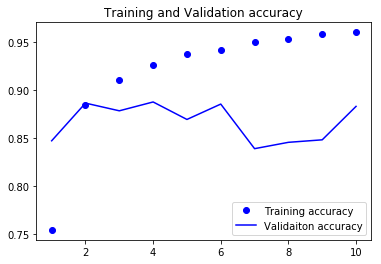

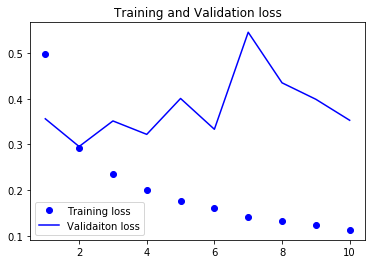

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validaiton accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validaiton loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()